## Observations and Insights 

# Positive or negative correlation?
With Capomulin Regimen, there is a strong positive correlation between the mouse weight and the average tumor volume, so the more the mouse weighed, the larger their tumor volume.


### Data Cleaning

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
# https://www.geeksforgeeks.org/python-pandas-dataframe-nunique/
combined['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Riham helped with this!!!
combined.loc[combined.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# from Askbcs Learning Assitant
duplicate_mouse_data = combined.loc[combined["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# based on getting duplicate information above, duplicate mouse "g989". 

clean_data= combined.drop_duplicates(subset= ['Mouse ID', 'Timepoint'])
clean_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].nunique()

249

In [7]:
clean_df = clean_data
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
clean_df.to_csv("Output/combineddata.csv", index = False, header = True)

## Summary Statistics

In [9]:
# group dataframe by drug regimen prior to performing summary tasks below
drug_regimen_group_df = clean_df.groupby('Drug Regimen')


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mice_mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mice_median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
mice_var = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
mice_std = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
mice_sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


In [11]:
# Assemble the resulting series into a single summary dataframe.
drug_regimen_dict = {
#     "Drug Regimen": ["Capomulin", 'Ceftamin', 'Infubinol','Ketapril', 'Naftisol', 'Placebo','Propriva', 'Ramicane','Stelasyn', 'Zoniferol'], 
    "Mean": mice_mean,
    "Median":mice_median,
    "Variance": mice_var,
    "Standard Deviation": mice_std,
    "SEM": mice_sem
    
}

In [12]:
drug_regimen_df = pd.DataFrame(drug_regimen_dict)
drug_regimen_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
drug_regimen_df.to_csv("Output/drug_regimen_summary.csv", index = True, header = True)

## Bar and Pie Charts

Text(0, 0.5, 'Unique Mice Tested')

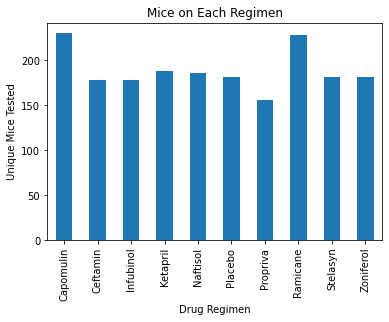

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
pandasbar = clean_df.groupby('Drug Regimen').count()['Mouse ID']
pandasbar_plot = pandasbar.plot.bar(title="Mice on Each Regimen")

pandasbar_plot.set_xlabel('Drug Regimen')
pandasbar_plot.set_ylabel("Unique Mice Tested")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

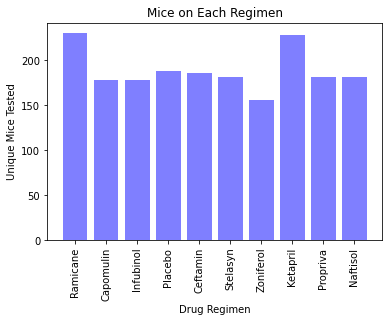

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
Pybar = clean_df.groupby('Drug Regimen').count()['Mouse ID']
x_axis = clean_df['Drug Regimen'].unique()

plt.bar(x_axis, Pybar, color='b', alpha=0.5, align ="center")
plt.title("Mice on Each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Unique Mice Tested")
# https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/ to rotate the x-axis labels
plt.xticks(rotation=90, horizontalalignment='center')

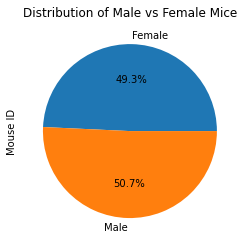

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df.groupby("Sex").count()['Mouse ID']

pandaspie = gender.plot.pie(y="Sex", title="Distribution of Male vs Female Mice", autopct="%1.1f%%")

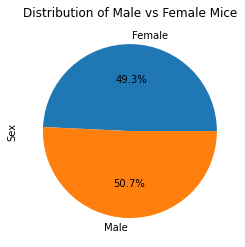

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_df.groupby("Sex").count()['Mouse ID']

plt.pie(gender,autopct="%1.1f%%",labels=gender.index);
plt.title('Distribution of Male vs Female Mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
quartile_df = clean_df
quartile_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin = quartile_df.loc[quartile_df["Drug Regimen"]=="Capomulin"]
ramicane = quartile_df.loc[quartile_df["Drug Regimen"]=="Ramicane"]
infubinol = quartile_df.loc[quartile_df["Drug Regimen"]=="Infubinol"]                        
ceftamin = quartile_df.loc[quartile_df["Drug Regimen"]=="Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
cap_max=capomulin.groupby('Mouse ID').max()['Timepoint']
cap_max_df = pd.DataFrame(cap_max)
cap_max_merge = pd.merge(cap_max_df,quartile_df, on=['Mouse ID','Timepoint'], how='left')
cap_max_merge.head()

ram_max=ramicane.groupby('Mouse ID').max()['Timepoint']
ram_max_df = pd.DataFrame(ram_max)
ram_max_merge = pd.merge(ram_max_df,quartile_df, on=['Mouse ID','Timepoint'], how='left')
ram_max_merge.head()

inf_max=infubinol.groupby('Mouse ID').max()['Timepoint']
inf_max_df = pd.DataFrame(inf_max)
inf_max_merge = pd.merge(inf_max_df,quartile_df, on=['Mouse ID','Timepoint'], how='left')
inf_max_merge.head()

cef_max=ceftamin.groupby('Mouse ID').max()['Timepoint']
cef_max_df = pd.DataFrame(cef_max)
cef_max_merge = pd.merge(cef_max_df,quartile_df, on=['Mouse ID','Timepoint'], how='left')
cef_max_merge.head()

# merge all 4 dataframes into one to loop through in next cell
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html concatenating objects
frames = [cap_max_merge,ram_max_merge, inf_max_merge, cef_max_merge]
maxtumorvol_four_treatments_df = pd.concat(frames)
maxtumorvol_four_treatments_df.head()
final_maxtumorvol_four_treatments_df = maxtumorvol_four_treatments_df.reset_index(drop=True)
final_maxtumorvol_four_treatments_df.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'}, inplace = True)
final_maxtumorvol_four_treatments_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [ ]:
# Put treatments into a list for for loop (and later for plot labels
#  Create empty list to fill with tumor vol data (for plotting)
treatments= []
tumor_vol_data = []

for drugs in final_maxtumorvol_four_treatments_df['Drug Regimen']:
    drug = row[2]
    if drug
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

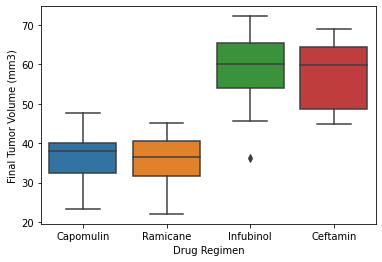

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
# https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn
# https://stackoverflow.com/questions/49680331/typeerror-dataframe-object-is-not-callable-error-when-using-seaborn-pairplot
box_plot_df=final_maxtumorvol_four_treatments_df[['Drug Regimen', 'Final Tumor Volume (mm3)']]
box_plot_df
df=pd.DataFrame(columns=box_plot_df)
sns.boxplot(x=box_plot_df["Drug Regimen"], y =box_plot_df["Final Tumor Volume (mm3)"], data = pd.melt(df))



## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# https://kanoki.org/2020/01/21/pandas-dataframe-filter-with-multiple-conditions/
capomulin = clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin") & (clean_df['Mouse ID']=="x401")]

x_axis = capomulin['Timepoint']
tumor_vol = capomulin['Tumor Volume (mm3)']
capomulin_line=plt.plot(x_axis, tumor_vol, color='purple', linewidth=2,)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume")
plt.title('Capolumlin Treatment of Mouse x401')
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_all = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]

capomulin_average_df=capomulin_all.groupby(['Mouse ID']).mean()
capomulin_average_df
x_axis=capomulin_average_df['Weight (g)']
avg_tumor_vol=capomulin_average_df['Tumor Volume (mm3)']

plt.scatter(x_axis, avg_tumor_vol, marker="o", facecolors="green", edgecolors="black",
            s=30, alpha=0.75)
plt.ylim(34, 47)
plt.xlim(14,26 )
plt.title("Capomulin Regimen - Weigth (g) vs Avg Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_all = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]

capomulin_average_df=capomulin_all.groupby(['Mouse ID']).mean()
capomulin_average_df
x_values=capomulin_average_df['Weight (g)']
y_values=capomulin_average_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="green", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.ylim(34, 47)
plt.xlim(14,26 )
plt.title("Capomulin Regimen - Weigth (g) vs Avg Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

In [ ]:
weight = capomulin_average_df.iloc[:,1]
tumor = capomulin_average_df.iloc[:,3]
correlation = st.pearsonr(weight,tumor)

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")